In [1]:
from acquire import get_telco_data
from prepare import clean_data

import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

# preparing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, precision_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

#For data dictionary
from tabulate import tabulate

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# <center>Acquire Data<center>

In [2]:
# Use the imported function from acquire.py to panda data frame
df = get_telco_data()
# View the first 5 recored of data frame a look at our dataframe
df.head(5).T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


# Prepare Data

In [3]:
''' 
Function cleans and prepares Telco data frame and ensures clean and tidy data \
before is split 
'''
df = get_telco_data()
df = df.drop_duplicates() # Drop duplicates 
df = df.drop(columns = ['customer_id']) # Data does not add value
 # Delete records withiut tota charges 
null_total_charges = list(df[df.total_charges.str.contains(" ")].index)
df = df.drop(null_total_charges)
# turn total_charges from iobject datatype to float
df["total_charges"] = pd.to_numeric(df["total_charges"])
# Change gender to is Female. Columns only contains Male and Female
# If Female record == 1 
# If Male recorf == 0
df['is_female'] = df.gender == "Female"
df.is_female.replace([True, False], [1,0], inplace = True)
df = df.drop(columns=['gender']) # Drop old redundant data
# Chage `object` data type to 1 and 0 for values that represent boolean values
# Change Yes ==> 1
# Change No ==> 0
df.partner.replace(['Yes', 'No'], [1,0], inplace = True)
df.phone_service.replace(['Yes', 'No'], [1,0], inplace = True)
df.dependents.replace(['Yes', 'No'], [1,0], inplace = True)
df.paperless_billing.replace(['Yes', 'No'], [1,0], inplace = True)
df.churn.replace(['Yes', 'No'], [1,0], inplace = True)
# create a daframe that holds the values of n
dummy_df = pd.get_dummies(df[['multiple_lines', \
                                'online_security', \
                                'online_backup', \
                                'device_protection', \
                                'tech_support', \
                                'streaming_tv', \
                                'streaming_movies', \
                                'contract_type', \
                                'internet_service_type', \
                                'payment_type'] \
                                ], dummy_na=False, drop_first=True)
# Attach duumy vairiables to the original data frame
df = pd.concat([df, dummy_df], axis=1)
# Creates a column holding boolean values if customer has internet
df['no_internet'] = df['device_protection_No internet service']
# get all the columns that that indicate customer does not have internet
no_internet_columns = [col for col in df.columns if 'No internet service' in col]
# Drop all the colums that repete no_internet data
for col in df.columns:
    for str in no_internet_columns:
        if str in col:
            del df[col]



In [4]:
df.head().T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
senior_citizen,0,0,0,0,0
partner,1,0,0,1,1
dependents,1,0,0,1,0
tenure,65,54,56,20,72
phone_service,1,0,0,0,1
multiple_lines,Yes,No phone service,No phone service,No phone service,Yes
online_security,Yes,Yes,Yes,Yes,No


In [5]:
no_internet_columns

['online_security_No internet service',
 'online_backup_No internet service',
 'device_protection_No internet service',
 'tech_support_No internet service',
 'streaming_tv_No internet service',
 'streaming_movies_No internet service']

In [7]:
df = clean_data()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   payment_type_id                    7032 non-null   int64  
 1   internet_service_type_id           7032 non-null   int64  
 2   contract_type_id                   7032 non-null   int64  
 3   senior_citizen                     7032 non-null   int64  
 4   partner                            7032 non-null   int64  
 5   dependents                         7032 non-null   int64  
 6   tenure                             7032 non-null   int64  
 7   phone_service                      7032 non-null   int64  
 8   multiple_lines                     7032 non-null   object 
 9   online_security                    7032 non-null   object 
 10  online_backup                      7032 non-null   object 
 11  device_protection                  7032 non-null   objec

In [41]:
list(df.columns)

AttributeError: 'Index' object has no attribute 'info'

In [39]:
print(tabulate(df.info().tolist(), tablefmt="github",  headers="keys"))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   payment_type_id                    7032 non-null   int64  
 1   internet_service_type_id           7032 non-null   int64  
 2   contract_type_id                   7032 non-null   int64  
 3   senior_citizen                     7032 non-null   int64  
 4   partner                            7032 non-null   int64  
 5   dependents                         7032 non-null   int64  
 6   tenure                             7032 non-null   int64  
 7   phone_service                      7032 non-null   int64  
 8   multiple_lines                     7032 non-null   object 
 9   online_security                    7032 non-null   object 
 10  online_backup                      7032 non-null   object 
 11  device_protection                  7032 non-null   objec

AttributeError: 'NoneType' object has no attribute 'tolist'

## Train, Validate, Test Split


In [11]:
# Creates a fucntion that train_validate_test_split the data before using it
# in the exploratory phase
def train_validate_test_split(x):
    """
    This function returns three datasets labeld as train, validate, test
    Data is divided as follows:
    - train    = 50%
    - validate = 30%
    - test     = 20%
    """
    train_validate, test = train_test_split(x, test_size=.2, 
                                            random_state=123, 
                                            stratify=x.churn)
    
    # Split train_validate into train and validate datasets.
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [12]:
train, validate, test = train_validate_test_split(df)

In [13]:
print(train.shape)
print(validate.shape)
print(test.shape)

(3937, 38)
(1688, 38)
(1407, 38)


# <center>Exploratory<center>

In [14]:
churn_rate = train.churn.value_counts(normalize=True)[1]
churn_rate

0.2656845313690627

In [15]:
train['internet_service_type_None']

6096    1
1603    0
5350    0
2068    0
6366    1
       ..
296     0
4200    0
3012    0
763     0
3935    0
Name: internet_service_type_None, Length: 3937, dtype: uint8

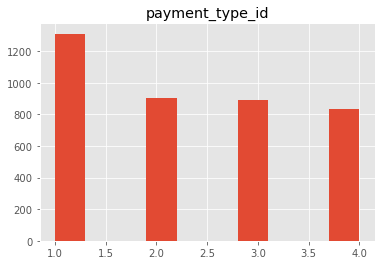

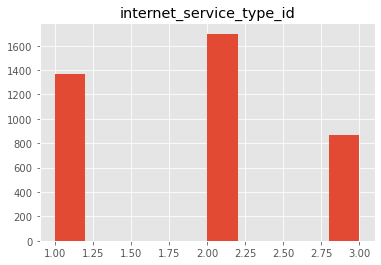

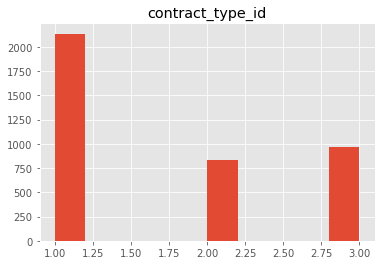

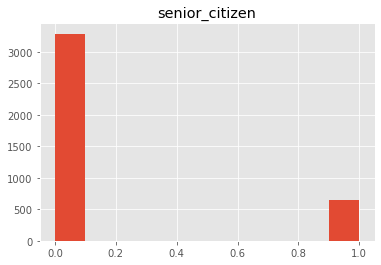

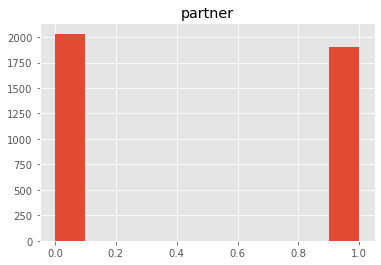

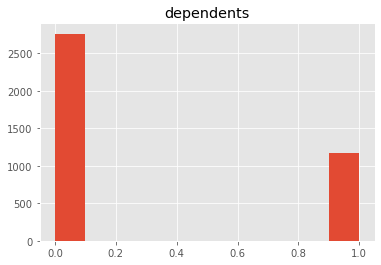

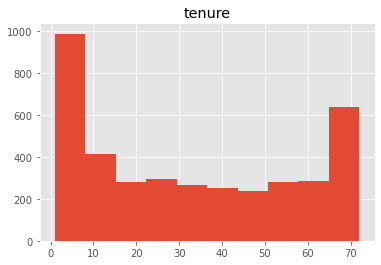

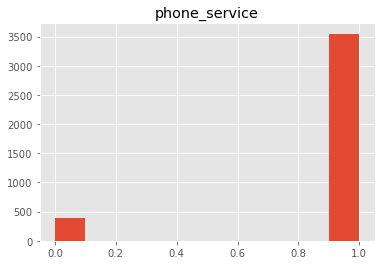

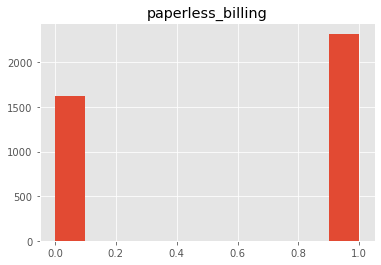

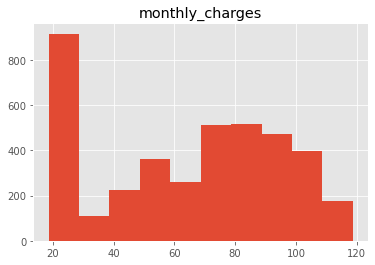

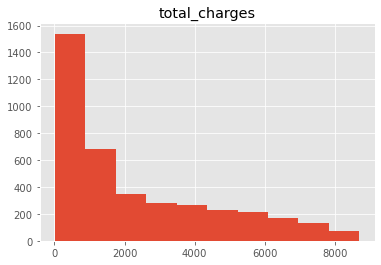

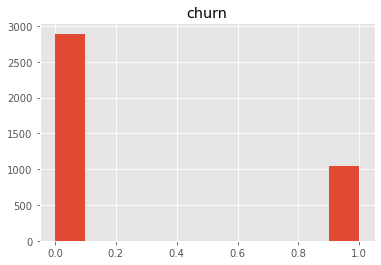

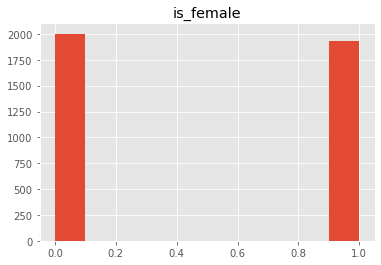

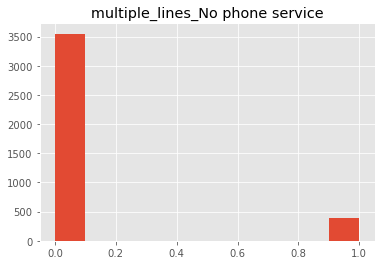

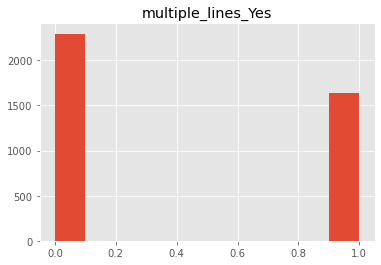

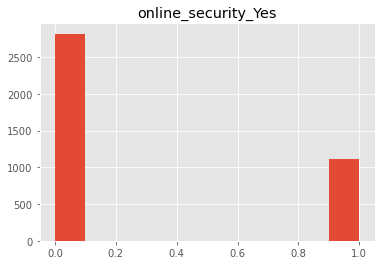

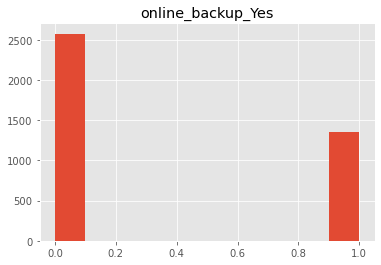

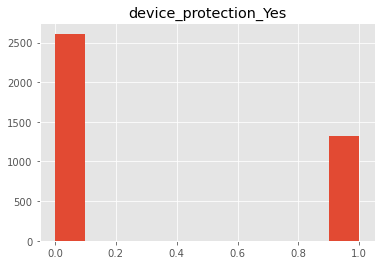

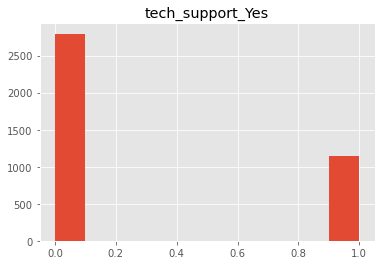

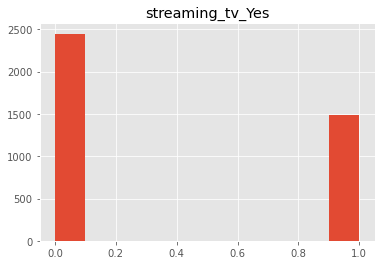

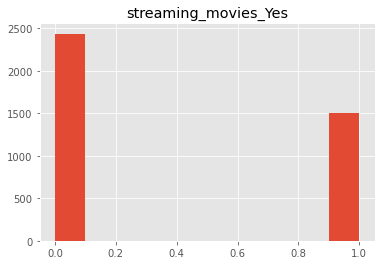

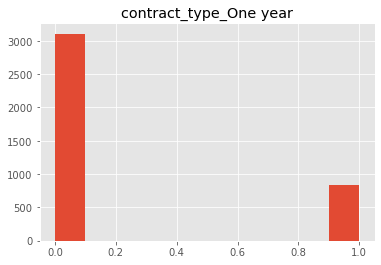

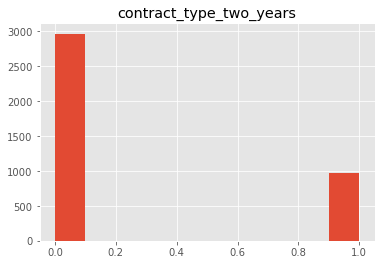

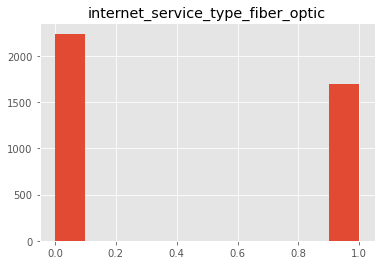

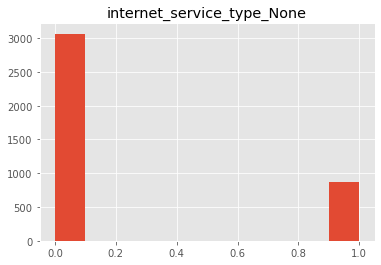

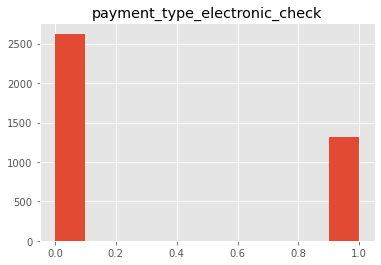

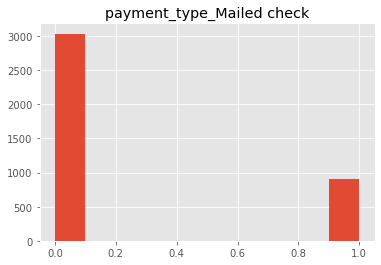

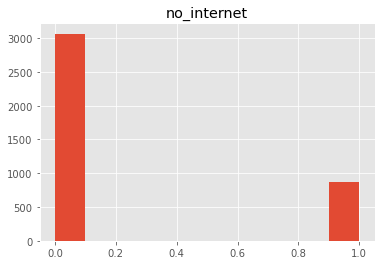

In [16]:
# Plot numeric columns
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    plt.style.use('ggplot')
    plt.hist(train[col])
    plt.title(col)
    plt.show()
   

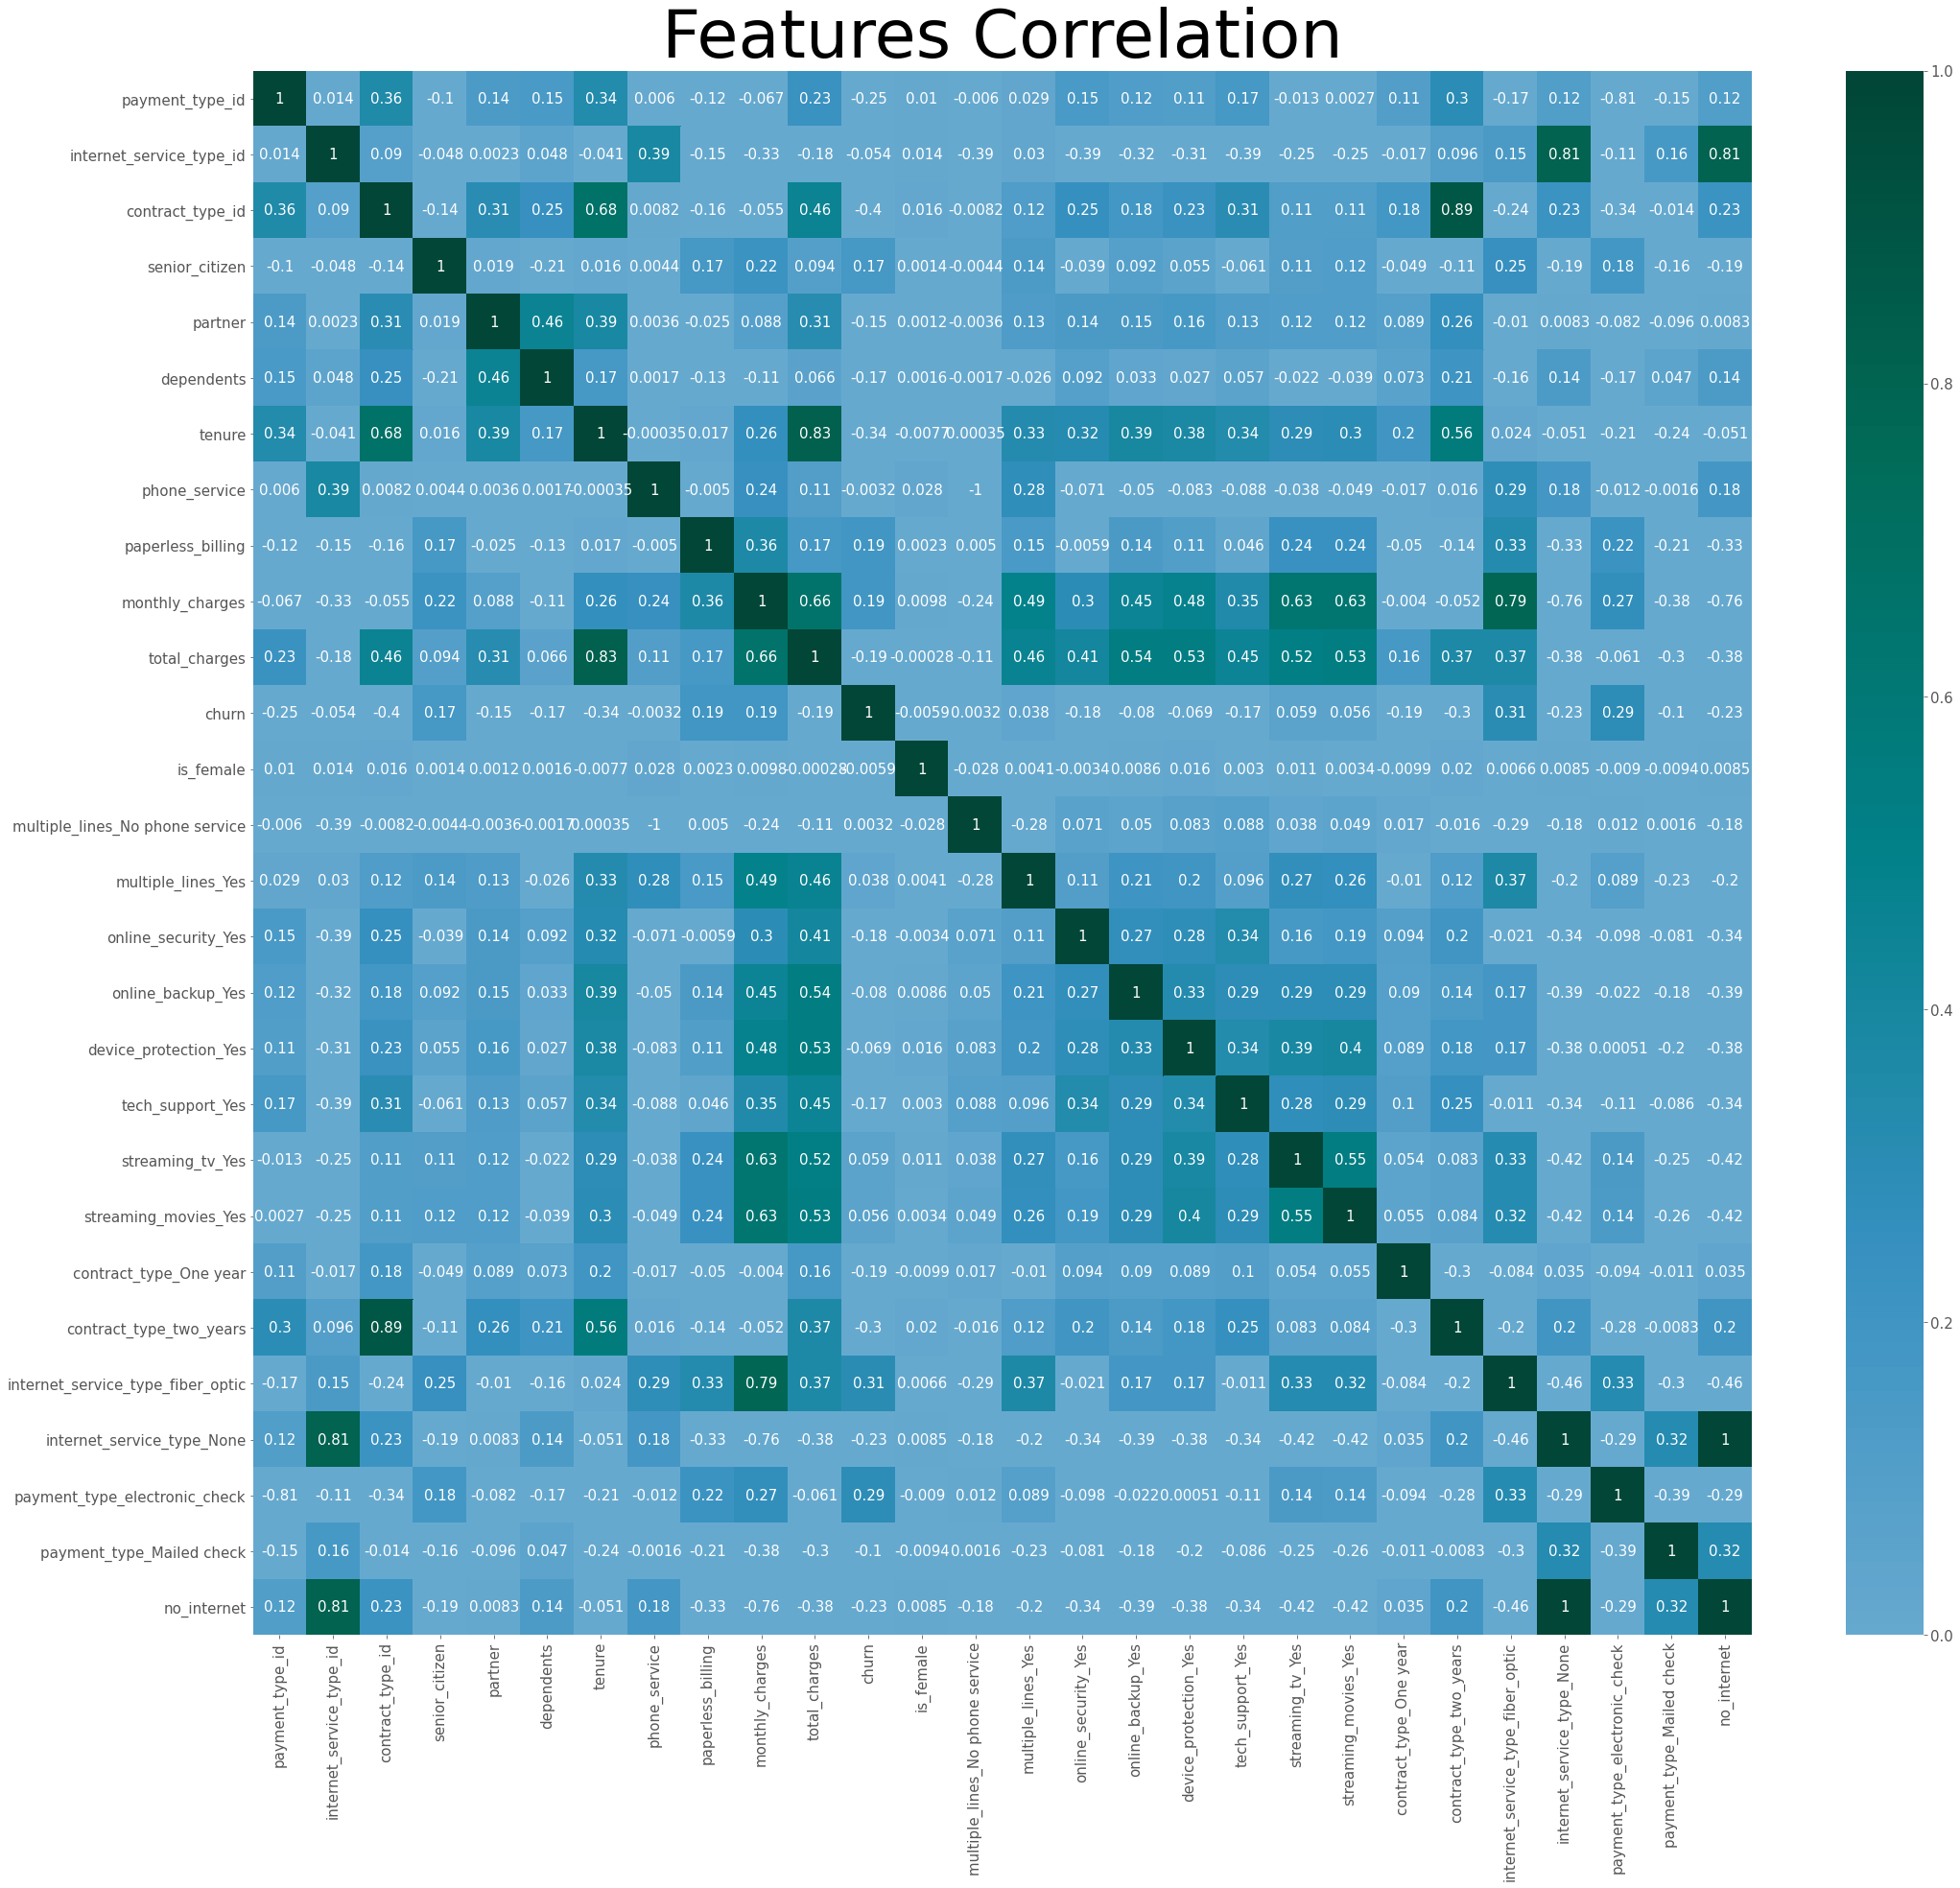

In [17]:
# chrats heat map  showing correlation 
plt.rc('figure', figsize=(35, 30))
plt.rc('font', size=15)
sns.heatmap(train.corr(), cmap="PuBuGn",\
            annot=True,\
            center=0,
            vmin=0, vmax=1) # allows for better visual identification of correlation 

plt.title('Features Correlation', size=70)
plt.show()

In [18]:
#  select features related to hipothesis
tenure_and_churn = train[['contract_type',\
                        'tenure',\
                        'churn',\
                        'internet_service_type',\
                        'online_backup_Yes',\
                        'device_protection_Yes',\
                        'online_security_Yes',\
                        'payment_type',\
                        'streaming_tv_Yes',\
                        'streaming_movies_Yes',\
                        'partner', \
                        'dependents'
                        ]]

tenure_and_churn.head(2)

,contract_type,tenure,churn,internet_service_type,online_backup_Yes,device_protection_Yes,online_security_Yes,payment_type,streaming_tv_Yes,streaming_movies_Yes,partner,dependents
6096,Two year,70,0,None,0,0,0,Bank transfer (automatic),0,0,1,0
1603,Month-to-month,15,0,DSL,1,1,0,Mailed check,0,1,1,1


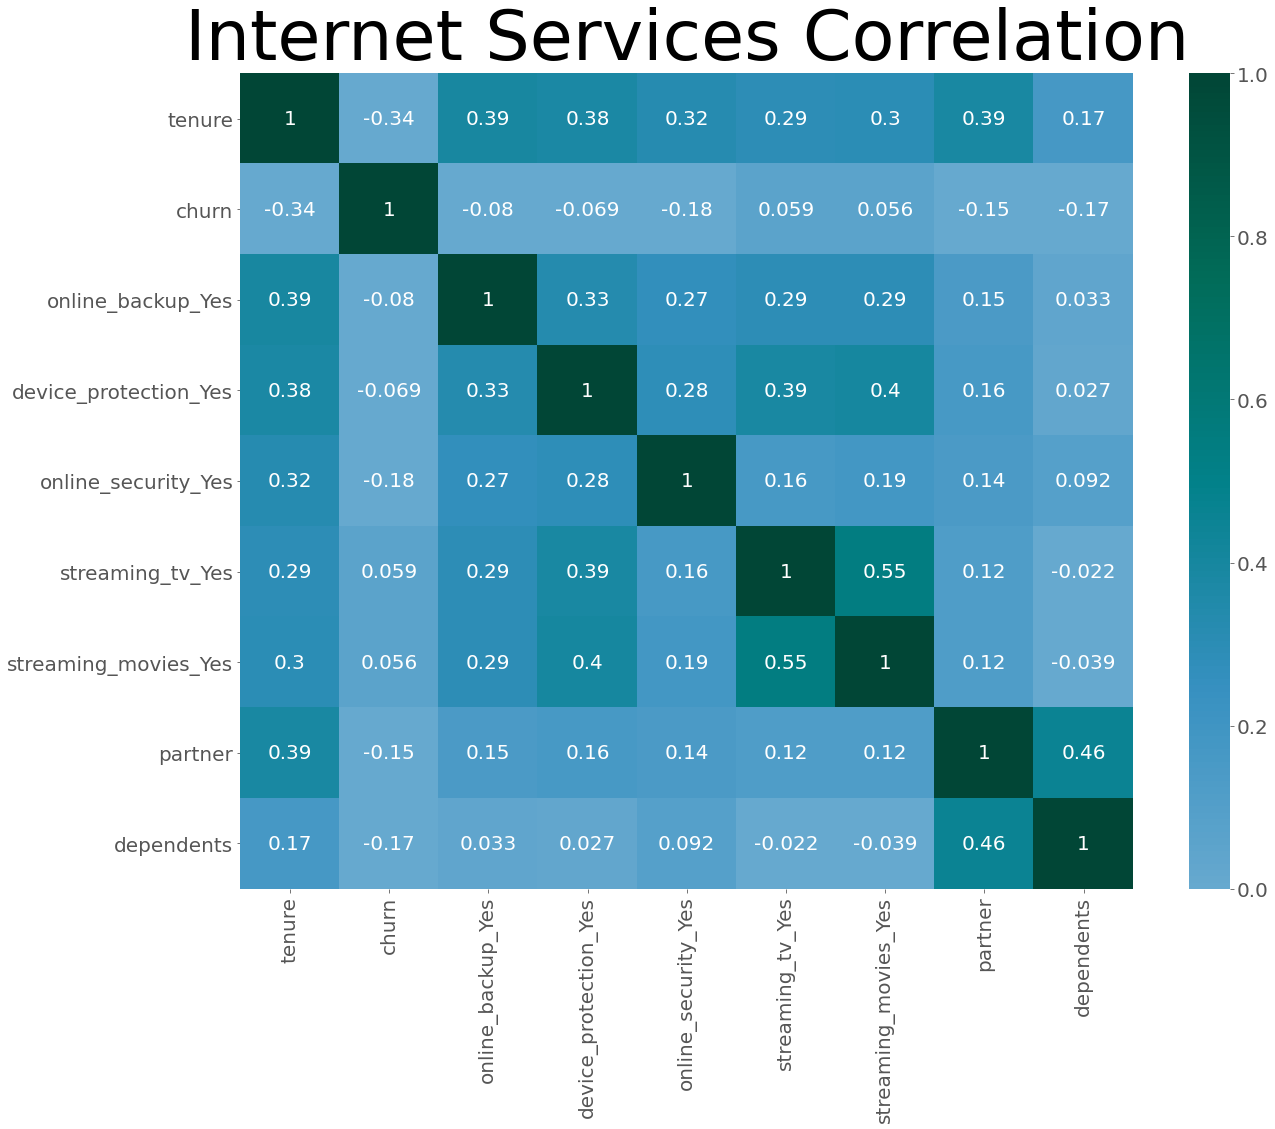

In [19]:
# chrats heat map  showing correlation 
plt.rc('figure', figsize=(20, 15))
plt.rc('font', size=20)
sns.heatmap(tenure_and_churn.corr(), cmap="PuBuGn",\
            annot=True,\
            center=0,
            vmin=0, vmax=1) # allows for better visual identification of correlation 

plt.title('Internet Services Correlation', size=70)
plt.show()

## Takeaway
- Security features might be better than any other feature it comes to churn
- Customer should have partner might be more loyal than sigle oness

###  Statistical test set up

In [20]:
# define alpha
alpha = .05

## Does the internet service affect churn?

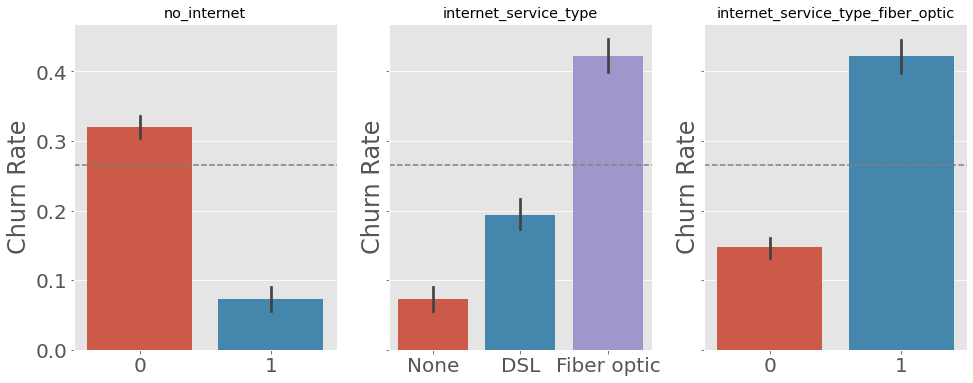

In [21]:
# churn rate by internet service

features = ['no_internet', 'internet_service_type', 'internet_service_type_fiber_optic']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    plt.rc('font', size=10)
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Takeaway
- People who had Internet service churn at a rate of over three times the people who don't
- People who use fiber optic leave add a rate of two times of those use DSL.

## Hypothesis

$H_0$: Rate of churn is not dependent on customer Internet_service_type.

$H_1$: Rate of churn is dependent customer Internet_service_type.


## Do people that use streemers churn more than average

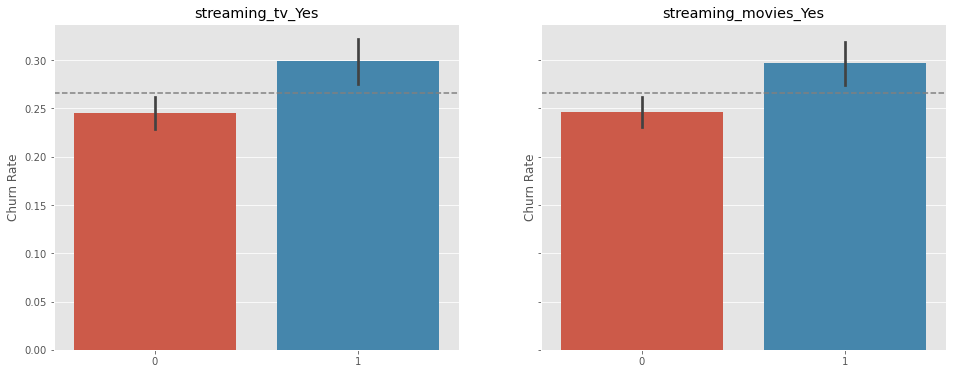

In [22]:
#streamers churn barplots

features = ['streaming_tv_Yes', 'streaming_movies_Yes']
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Takeaway
- Streaming services seem to increase churn 


## Hypothesis

$H_0$: Rate of churn is not dependent on customer streaming movies.

$H_1$: Rate of churn is dependent customer streaming movies.

## Does having online secqurity fetures decrease churn?  

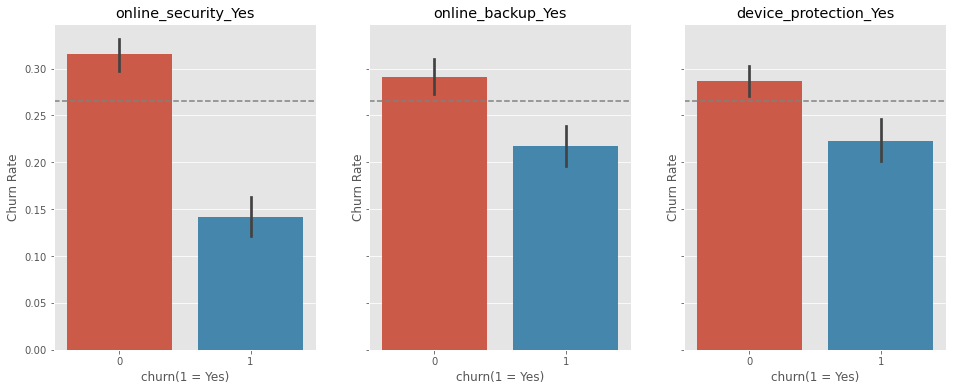

In [23]:
# Does having online secqurity fetures decrease churn 

features = ['online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',]

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    plt.rc('font', size=10)
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('churn(1 = Yes)')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Takeway
- people who use security features stay longer the people that don't
- Online security seems to increase more than anything else


## Hypothesis

$H_0$: Rate of churn is not dependent on client having online_sequrity_Yes.

$H_1$: Rate of churn is dependent on client having online_sequrity_Yes.

## Do singles people stay longer? Does they way they relate to churn?

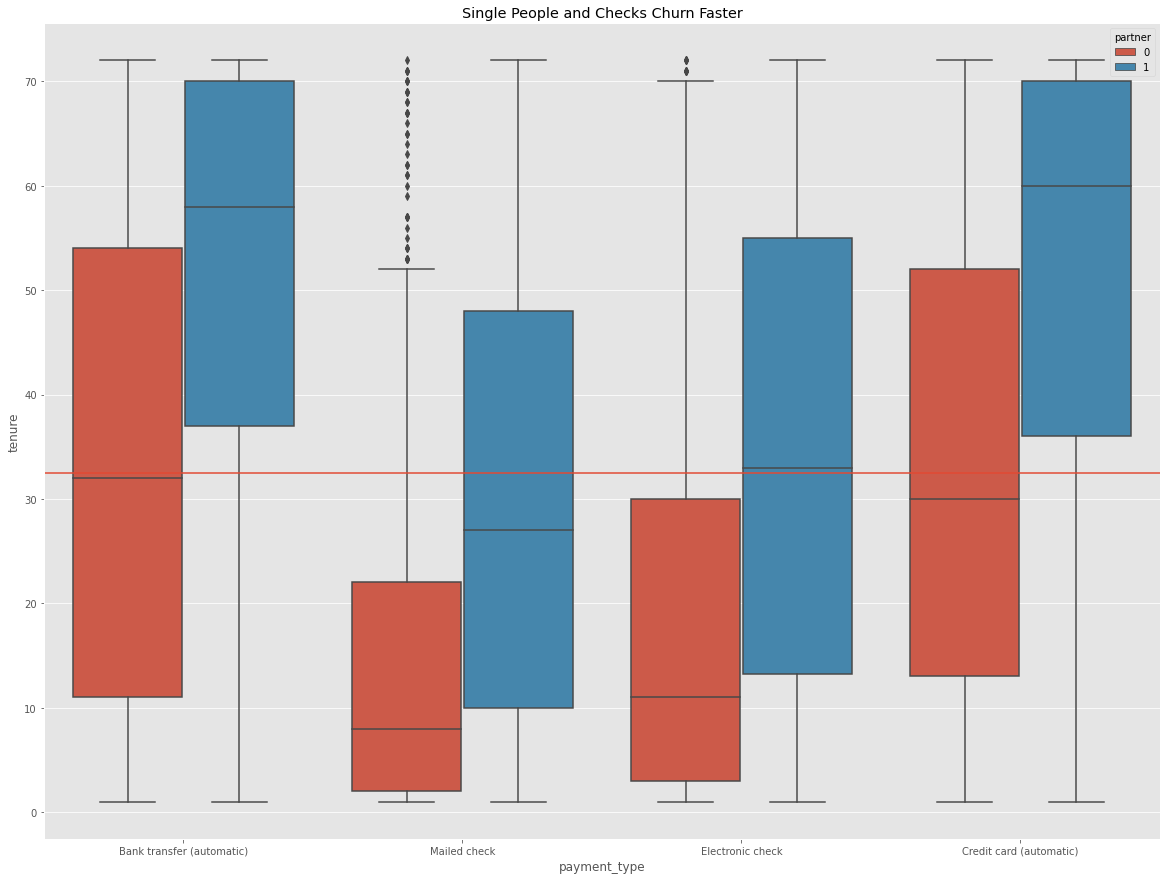

In [24]:
# Peple with parnters stay more than two times as ong as singles that use checks

plt.title("Single People and Checks Churn Faster")
sns.boxplot(x="payment_type", y="tenure", data=train, hue="partner",)
tenure_time_agerage = train.tenure.mean()
plt.axhline(tenure_time_agerage)
plt.show()


## Takeaway

- single pleople that use checks will no stay loinguer than year and a half. 
    - Try Incentivize customers to pay with bank transfer or credit card.

## Hypothesis

$H_0$: Tenure independent of bank transfer automatic payment

$H_1$: Tenure is independent of bank transfer automatic payment

In [25]:
# Satisttical Analysisi Features  

list(tenure_and_churn.columns)

['contract_type',
 'tenure',
 'churn',
 'internet_service_type',
 'online_backup_Yes',
 'device_protection_Yes',
 'online_security_Yes',
 'payment_type',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'partner',
 'dependents']

In [26]:
# Se the alpha to 1
alpha = 0.05 

# Modeling

In [27]:
train_validate, telco_test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)

telco_train, telco_validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

print(telco_train.shape)
print(telco_validate.shape)
print(telco_test.shape)

(3937, 38)
(1688, 38)
(1407, 38)


### Base Line

In [28]:
baseline_accuracy = (train.churn == 0).mean()
print(f"Baseline Accuracy is: {round(baseline_accuracy, 3)*100}%")

Baseline Accuracy is: 73.4%


#### Moedels used 
Logistic_Regression
DecisionTree
RandomForest

In [29]:
modeling = df.columns.values.tolist()
modeling = train.drop(columns=['multiple_lines_No phone service'])
modeling

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,contract_type_One year,contract_type_two_years,internet_service_type_fiber_optic,internet_service_type_None,payment_type_electronic_check,payment_type_Mailed check,no_internet
6096,3,3,3,0,1,0,70,1,No,No internet service,...,0,0,0,0,1,0,1,0,0,1
1603,2,1,1,0,1,1,15,1,No,No,...,1,0,1,0,0,0,0,0,1,0
5350,1,2,1,1,1,0,52,1,Yes,Yes,...,0,1,1,0,0,1,0,1,0,0
2068,1,1,1,0,0,0,39,0,No phone service,No,...,1,0,1,0,0,0,0,1,0,0
6366,2,3,2,0,1,0,32,1,No,No internet service,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,1,3,0,1,1,71,1,Yes,Yes,...,1,1,1,0,1,0,0,0,0,0
4200,3,2,1,1,1,0,16,1,No,No,...,0,0,0,0,0,1,0,0,0,0
3012,1,2,2,0,1,0,40,1,No,No,...,0,0,0,1,0,1,0,1,0,0
763,3,1,2,0,0,0,11,1,No,No,...,1,0,0,1,0,0,0,0,0,0


In [30]:
# Set features variable to onsed hilghlighted above 
features = df.columns.values.tolist()

In [31]:
# Set X and Y
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

y_train = train['churn']
y_validate = validate['churn']
y_test = test['churn']

In [32]:
# Set threshold = .05
threshold = threshold = .05

In [33]:
y_validate

611     0
1155    0
4916    0
2816    0
5301    0
       ..
953     0
2053    1
1992    0
2271    0
4179    1
Name: churn, Length: 1688, dtype: int64

In [34]:
df.churn.mode()


0    0
dtype: int64

In [35]:
evaluations = pd.DataFrame({"actual": y_validate})
evaluations["baseline"] = 0
matrix = pd.crosstab(evaluations.actual, evaluations.baseline)
matrix

baseline,0
actual,
0,1239
1,449


## Decision Tree

In [36]:
# Make the model
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fit the model
clf = clf.fit(X_train, y_train)

# Train
y_pred = clf.predict(X_train)
train_accuracy = clf.score(X_train, y_train)

# Validate

y_pred = clf.predict(X_validate)
validate_accuracy = clf.score(X_validate, y_validate)


print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(clf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")


ValueError: could not convert string to float: 'No'

-------------


## Random forest 


In [ ]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=25,
                            max_depth=4, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))

------------


## K Neighbors

In [ ]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Train
y_pred = knn.predict(X_train)
train_accuracy = knn.score(X_train, y_train)

# Validate
y_pred = knn.predict(X_validate)
validate_accuracy = knn.score(X_validate, y_validate)

print('Accuracy of K Neighbors classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K Neighbors classifier on validate set: {:.3f}'
      .format(knn.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")


## Logistic Regresion

In [ ]:
# Make the model
logit = LogisticRegression(C=.5, random_state=123)

# Fit the Model
logit.fit(X_train, y_train)

# Train
y_pred = logit.predict(X_train)
train_accuracy = logit.score(X_train, y_train)

# Validate
y_pred = logit.predict(X_validate)
validate_accuracy = logit.score(X_validate, y_validate)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.3f}'
      .format(logit.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

In [ ]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

# Test
y_pred = rf.predict(X_test)
test_accuracy = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
      .format(rf.score(X_test, y_test)))

Feature Importance

In [ ]:

rf.feature_importances_

In [ ]:
proba_test = rf.predict_proba(X_test)
proba_df = pd.DataFrame(proba_test, columns=rf.classes_.tolist())
reset_test = test.reset_index()
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df = test_proba_df.rename(columns={0: 'not_churn', 1:'churn_yes'})
test_proba_df['predicted'] = np.where(test_proba_df.not_churn > test_proba_df.churn_yes, 'not_churn', 'churn')
csv_df = test_proba_df[['index', 'churn', 'not_churn', 'churn_yes', 'predicted']]
csv_df.samp()

In [ ]:
csv_df.sample(20)